## 1. Introduction to the Data Set

In this project, you'll try to predict the total number of bikes people rented in a given hour. You'll predict the cnt column using all of the other columns, except for casual and registered. To accomplish this, you'll create a few different machine learning models and evaluate their performance.

### Instructions

- Use the pandas library to read bike_rental_hour.csv into the dataframe bike_rentals.
- Print out the first few rows of bike_rentals and take a look at the data.
- Make a histogram of the cnt column of bike_rentals, and take a look at the distribution of total rentals.
- Use the corr method on the bike_rentals dataframe to explore how each column is correlated with cnt.

In [1]:
import pandas

bike_rentals = pandas.read_csv("data/hour.csv")
bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

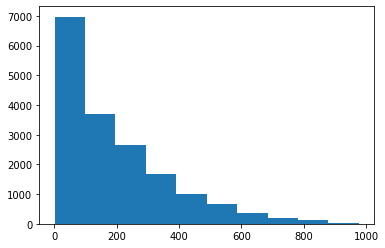

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(bike_rentals["cnt"])

In [4]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
time_label   -0.378318
Name: cnt, dtype: float64

## 2. Calculating Features

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information, or distilling existing information.

For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine will treat each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This will bundle similar times together, enabling the model to make better decisions.

## Instructions

- Write a function called assign_label that takes in a numeric value for an hour, and returns:
    - 1 if the hour is from 6 to 12
    - 2 if the hour is from 12 to 18
    - 3 if the hour is from 18 to 24
    - 4 if the hour is from 0 to 6
- Use the apply method on series objects to apply the function to each item in the hr column.
- Assign the result to the time_label column of bike_rentals.

In [2]:
def assign_label(hour):
    if hour >=0 and hour < 6:
        return 4
    elif hour >=6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour <=24:
        return 3

bike_rentals["time_label"] = bike_rentals["hr"].apply(assign_label)

## 3. Splitting the Data Into Train and Test Sets

Before you can begin applying machine learning algorithms, you'll need to split the data into training and testing sets. This will enable you to train an algorithm using the training set, and evaluate its accuracy on the testing set. If you train an algorithm on the training data, then evaluate its performance on the same data, you can get an unrealistically low error value, due to overfitting.

### Instructions

- Based on your explorations of the cnt column, pick an error metric you want to use to evaluate the performance of the machine learning algorithms. Explain why you chose this metric in a markdown cell.
- Select 80% of the rows in bike_rentals to be part of the training set using the sample method on bike_rentals. Assign the result to train.
- Select the rows that are in bike_rentals but not in train to be in the testing set. Assign the result to test.
    - This line will generate a Boolean series that's False when a row in bike_rentals isn't found in train: bike_rentals.index.isin(train.index)
    - This line will select any rows in bike_rentals that aren't found in train to be in the testing set: bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [5]:
#The mean squared error metric makes the most sense to evaluate our error. 
#MSE works on continuous numeric data, which fits our data quite well.
train = bike_rentals.sample(frac=.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

## 4. Applying Linear Regression

Now that you've done some exploration and manipulation, you're ready to apply linear regression to the data. Linear regression will probably work fairly well on this data, given that many of the columns are highly correlated with cnt.

As you learned in earlier missions, linear regression works best when predictors are linearly correlated to the target and also independent -- in other words, they don't change meaning when we combine them with each other. The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.

You'll need to ignore the casual and registered columns because cnt is derived from them. If you're trying to predict the number of people who rent bikes in a given hour (cnt), it doesn't make sense that you'd already know casual or registered, because those numbers are added together to get cnt.

### Instructions

- Create a list of predictor columns to use in training and predictions.
    - At a minimum, this list should exclude the cnt, casual, dteday, and registered columns.
    - Feel free to remove other columns you don't think will be useful for the predictions.
- Use the LinearRegression class from sklearn to train a machine learning algorithm on train.
    - Use only the columns in the list of predictors for this.
- Make predictions using the LinearRegression class on test.
    - Use the exact same predictor columns here.
- Calculate the error between the predictions and the actual values.
- Write your thoughts about the predictions and the error in a markdown cell.

In [9]:
from sklearn.linear_model import LinearRegression

predictors = list(train.columns)
predictors.remove("cnt")
predictors.remove("casual")
predictors.remove("registered")
predictors.remove("dteday")

reg = LinearRegression()

reg.fit(train[predictors], train["cnt"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
import numpy
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

16599.07800079829

## 5. Applying Decision Trees

Now you're ready to apply the decision tree algorithm. You'll be able to compare its error with the error from linear regression, which will enable you to pick the right algorithm for this data set.

Decision trees tend to predict outcomes much more reliably than linear regression models. Because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

### Instructions

- Use the DecisionTreeRegressor class to fit a decision tree algorithm to the train data.
- Make predictions using the DecisionTreeRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the DecisionTreeRegressor class, including min_samples_leaf, to see if it changes the error.
- Write your thoughts on the predictions and the error in a markdown cell.

The error is very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

In [11]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=5, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [12]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2640.103207551586

In [13]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2957.1433080808074

## 6. Applying Random Forests

You can now apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests can still be prone to overfitting, though, so it's important to tune parameters like maximum depth and minimum samples per leaf.

### Instructions

- Use the RandomForestRegressor class to fit a random forest algorithm to the train data.
- Make predictions using the RandomForestRegressor class on test.
- Calculate the error between the predictions and the actual values.
- Experiment with various parameters of the RandomForestRegressor class, including min_samples_leaf, to see if it changes the error.
- Write your thoughts on the predictions and the error in a markdown cell.

By taking the nonlinear predictors into account, the decision tree regressor appears to have much higher accuracy than linear regression.

In [14]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

1967.7425678897753

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.

Here are some potential next steps:

- Calculate additional features, such as:
    - An index combining temperature, humidity, and wind speed
- Try predicting casual and registered instead of cnt.